In [1]:
#Import des librairies Python
import pandas as pd
import os
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.cluster import hierarchy
from sklearn import preprocessing
from sklearn import cluster, metrics
from sklearn import decomposition
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from functions import *
import statsmodels.formula.api as smf

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
cwd = os.getcwd()
cwd

'C:\\Users\\NA00025036\\Desktop\\autrs\\nayescha\\06 - DétectezDesFauxBillets'

# **Mission 0**




**Afin d'introduire votre analyse, effectuez une brève description des données (analyses univariées et bivariées).**

In [4]:
data = pd.read_csv(cwd + '/data/notes.csv')
data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


In [5]:
#Recherche de valeur(s) manquante(s)
data.isna().any()

is_genuine      False
diagonal        False
height_left     False
height_right    False
margin_low      False
margin_up       False
length          False
dtype: bool

In [6]:
#Recherche de doublons 
data.duplicated().sum()

0

In [7]:
#Représentation des effectifs par type de billet vrai/faux(méthode utilisée .value_counts())
effectif = data['is_genuine'].value_counts()
modalite = effectif.index #l'index de 'effectifs' contient les modalités

tab = pd.DataFrame(modalite, columns = ['is_genuine']) #création du tableau à partir des modalités
tab["n"] = effectif.values
tab["f"] = tab["n"] / len(data) #len(data) renvoie la taille de l'échantillon
tab

,is_genuine,n,f
0,True,100,0.588235
1,False,70,0.411765


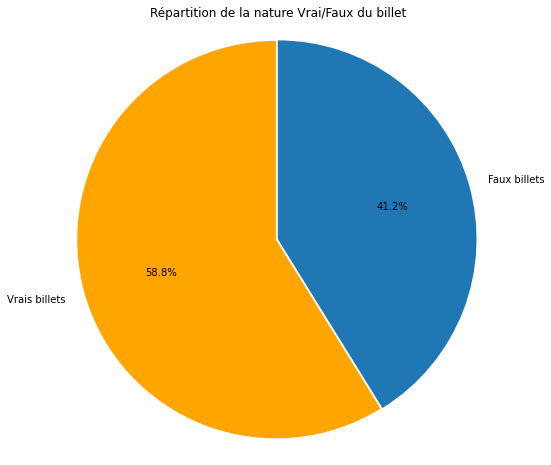

In [8]:
#Création d'un Pie Chart pour représenter la part de chaque type de billet
labels = 'Vrais billets', 'Faux billets'
sizes = tab['f']
explode = (0.01, 0)

fig1, ax = plt.subplots(figsize=(8,8))
ax.pie(sizes, explode=explode, labels=labels, colors=['orange','tab:blue'], 
        autopct='%1.1f%%', shadow=False, startangle=90)

ax.axis('equal') 
plt.title('Répartition de la nature Vrai/Faux du billet')
plt.show()

In [9]:
#Valeurs descriptives des variables quantitatives
data.describe().T

,count,mean,std,min,25%,50%,75%,max
diagonal,170.0,171.940588,0.305768,171.04,171.7300,171.945,172.1375,173.01
height_left,170.0,104.066353,0.298185,103.23,103.8425,104.055,104.2875,104.86
height_right,170.0,103.928118,0.330980,103.14,103.6900,103.950,104.1700,104.95
margin_low,170.0,4.612118,0.702103,3.54,4.0500,4.450,5.1275,6.28
margin_up,170.0,3.170412,0.236361,2.27,3.0125,3.170,3.3300,3.68
length,170.0,112.570412,0.924448,109.97,111.8550,112.845,113.2875,113.98


Ce tableau permet d'avoir une première idée des données que nous avons. Synthétique et très rapide à établir, c'est un point d'entré pertinent avant de pouvoir mieux connaître les variables et individus de l'échantillon.

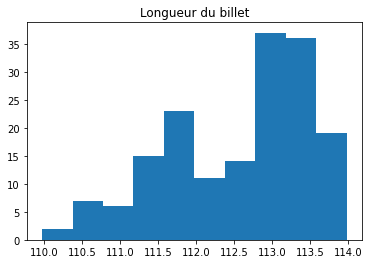

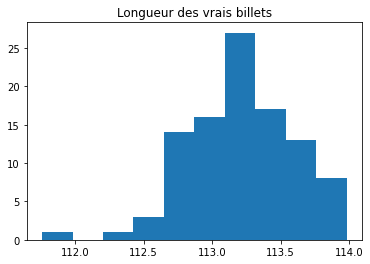

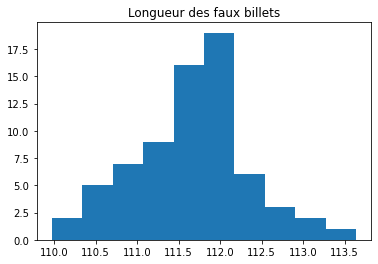

La longueur moyenne est de  :  112.57041176470587 mm
La valeur médiane est :  112.845 mm
La tendance centrale ou le mode est :  113 mm
La valeur minimale est :  109.97 mm
La valeur maximale est :  113.98 mm


In [10]:
fig, ax = plt.subplots()
ax.hist(data.length)
plt.title("Longueur du billet")
plt.savefig("graphiques/Longueur_du_billet.png")
plt.show()

fig, ax = plt.subplots()
ax.hist(data.length[data.is_genuine==True])
plt.title("Longueur des vrais billets")
plt.savefig("graphiques/Longueur_des_vrais_billets.png")
plt.show()

fig, ax = plt.subplots()
ax.hist(data.length[data.is_genuine==False])
plt.title("Longueur des faux billets")
plt.savefig("graphiques/Longueur_des_faux_billets.png")
plt.show()

print("La longueur moyenne est de  : ", data.length.mean(), "mm")
print("La valeur médiane est : ", data.length.median(), "mm")
print("La tendance centrale ou le mode est : ", int(data.length.mode()), "mm" )
print("La valeur minimale est : ", data.length.min(), "mm")
print("La valeur maximale est : ", data.length.max(), "mm")

In [11]:
num_notes = data.drop(['is_genuine'], axis=1)

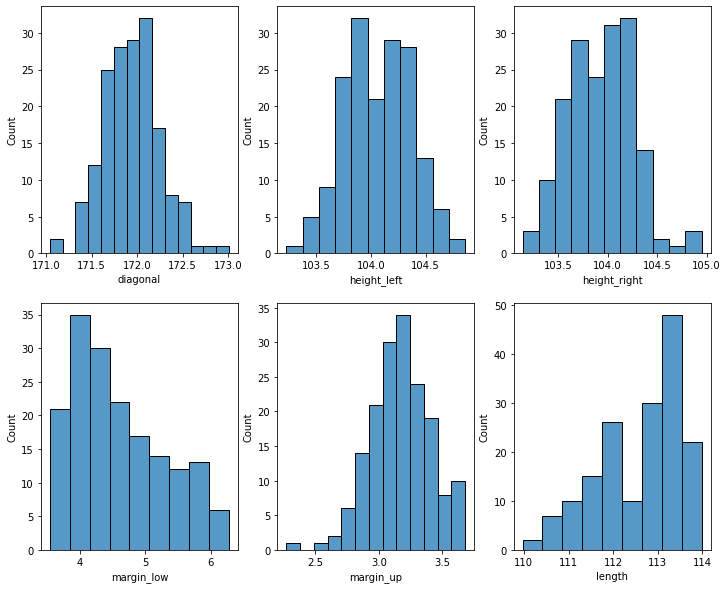

In [12]:
fig = display_multiple_distplot(num_notes, [(2,3)], title='no')
fig.savefig('graphiques/distplot', transparent =True)

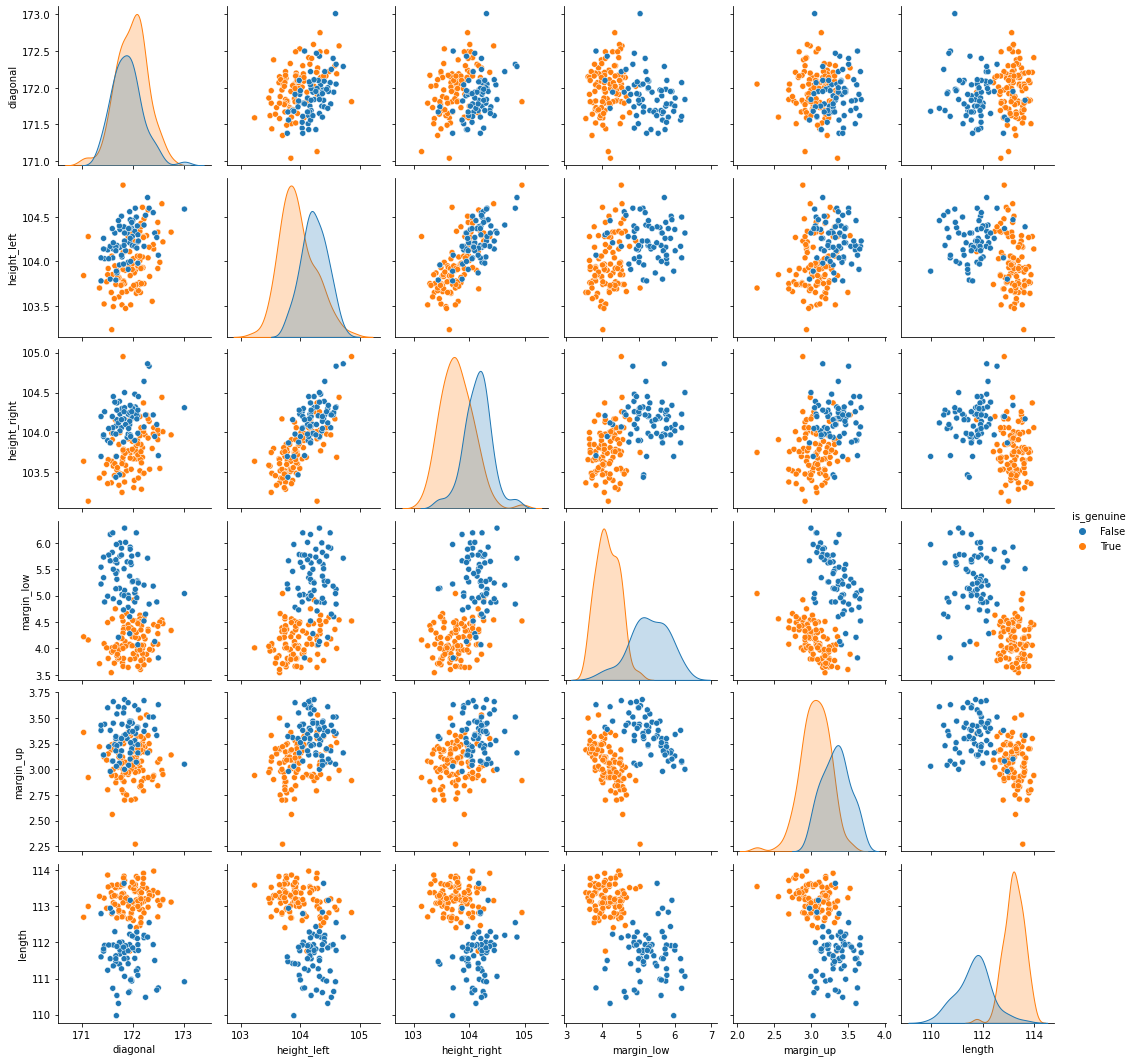

In [13]:
#Visualisation exploratoire des 6 variables quantitatives
#.pairplot une méthode de Seaborn simple et rapide pour se faire une idée visuelle des corrélations ou non
fig = sns.pairplot(data, hue="is_genuine")
fig.savefig('graphiques/pairplot', transparent=True)

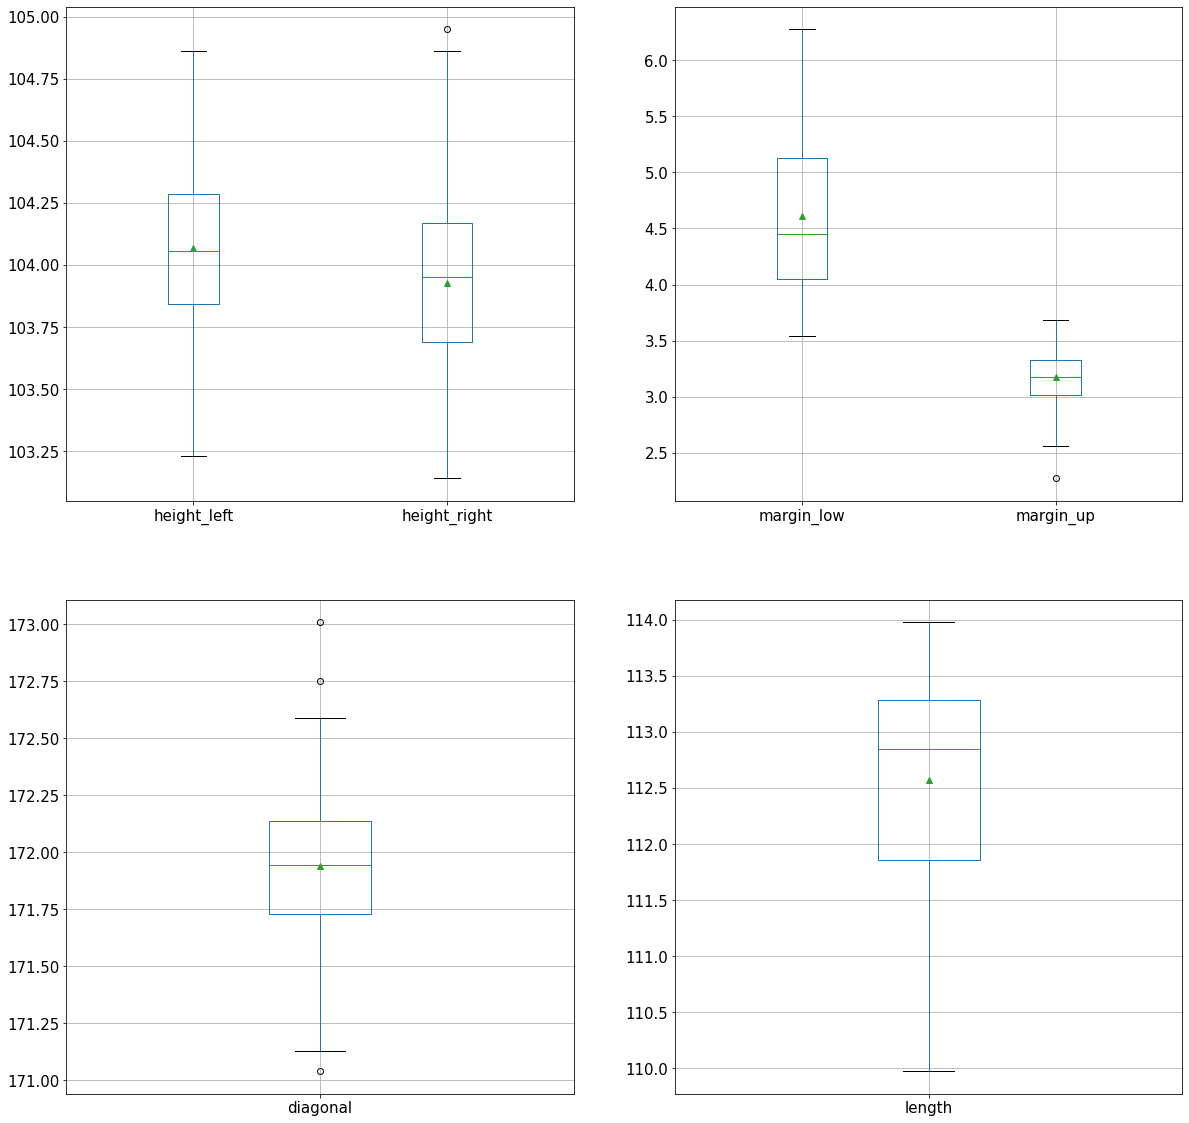

In [14]:
#Approche / identification visuelle par Boxplot de la distribution des variables et des éventuels outliers
plt.figure(figsize=(20, 20))
plt.title('Boxplot billet sans distinction vrai/faux')

plt.subplot(221)
data.iloc[:, 2:4].boxplot(fontsize=15, widths=0.2, showmeans=True)
plt.subplot(222)
data.iloc[:, 4:6].boxplot(fontsize=15, widths=0.2, showmeans=True)
plt.subplot(223)
data.iloc[:, 1:2].boxplot(fontsize=15, widths=0.2, showmeans=True)
plt.subplot(224)
data.iloc[:, -1:].boxplot(fontsize=15, widths=0.2, showmeans=True)

plt.savefig("graphiques/boxplot_1.png")
plt.show()

Ici on ne prend pas en compte si les billets sont "vrai/faux". Essayons l'approche Boxplot par variable selon la nature du billet.

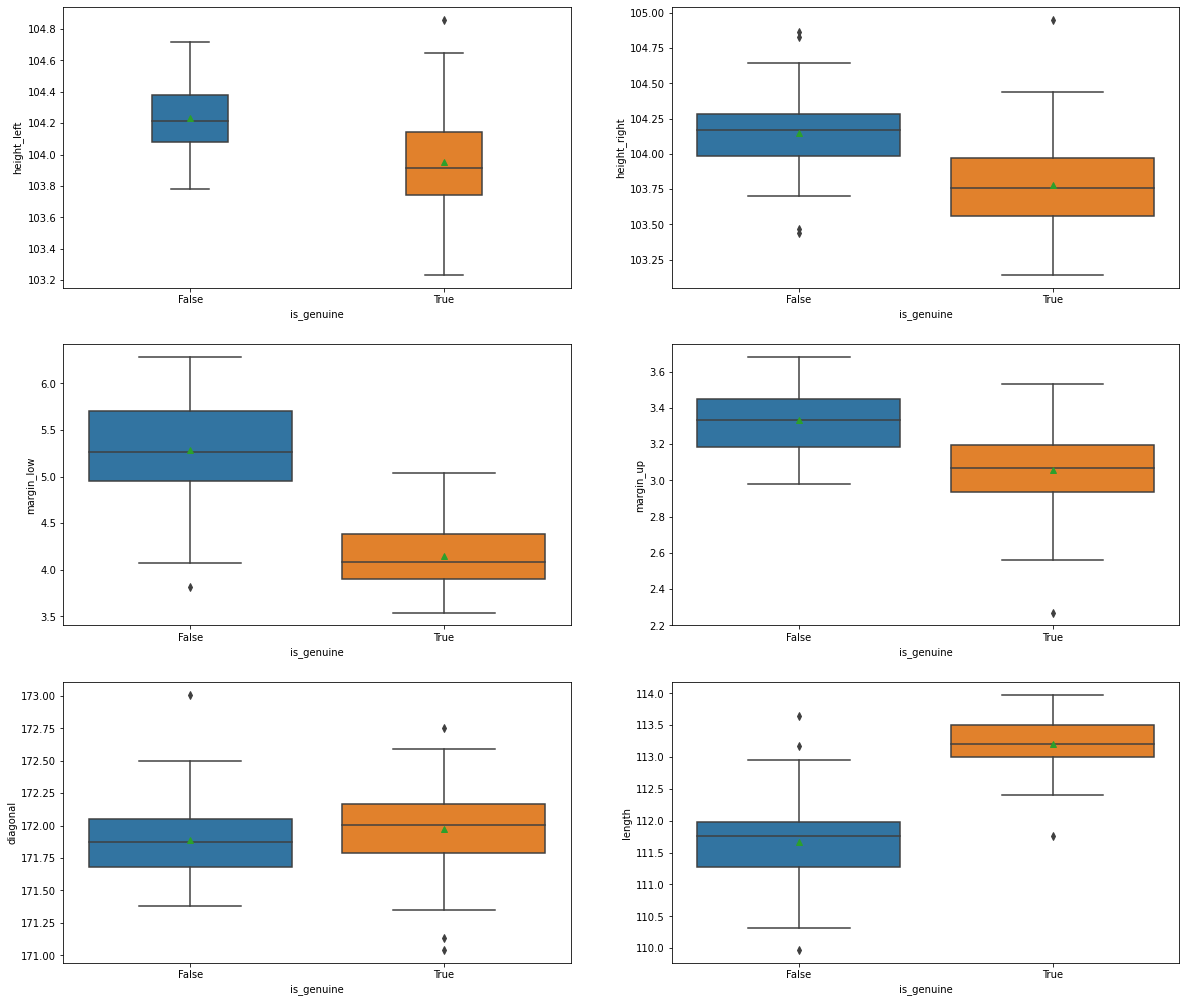

In [15]:
plt.figure(figsize=(20, 30))

plt.subplot(521)
sns.boxplot(x='is_genuine', y='height_left', width=0.3, data=data, showmeans=True)
plt.subplot(522)
sns.boxplot(x='is_genuine', y='height_right', data=data, showmeans=True)
plt.subplot(523)
sns.boxplot(x='is_genuine', y='margin_low', data=data, showmeans=True)
plt.subplot(524)
sns.boxplot(x='is_genuine', y='margin_up', data=data, showmeans=True)
plt.subplot(525)
sns.boxplot(x='is_genuine', y='diagonal', data=data, showmeans=True)
plt.subplot(526)
sns.boxplot(x='is_genuine', y='length', data=data, showmeans=True)

plt.savefig("graphiques/boxplot_2.png")
plt.show()

Un premier constat peut-être fait :

* les métriques 'margin' et 'height' ont des moyennes et médianes plus élevées pour les faux billets.
* la métrique 'length' a une moyenne et médiane plus basse pour les faux billets.
* la métrique 'diagonal' ne semble pas être significative.

Des outliers sont visibles, mais restent relativement proches des queues de distribution. Ces valeurs restent acceptables, elles ne semblent pas représenter d'erreur particulière. 

In [16]:
#Matrice des corrélations linéaires par l'utilisation de la méthode .corr()
data.iloc[:, 1:].corr()

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000000,0.319584,0.220418,-0.181020,-0.027366,0.080295
height_left,0.319584,1.000000,0.734390,0.424530,0.324788,-0.421387
height_right,0.220418,0.734390,1.000000,0.509375,0.366918,-0.417021
margin_low,-0.181020,0.424530,0.509375,1.000000,0.171113,-0.637352
margin_up,-0.027366,0.324788,0.366918,0.171113,1.000000,-0.525284
length,0.080295,-0.421387,-0.417021,-0.637352,-0.525284,1.000000


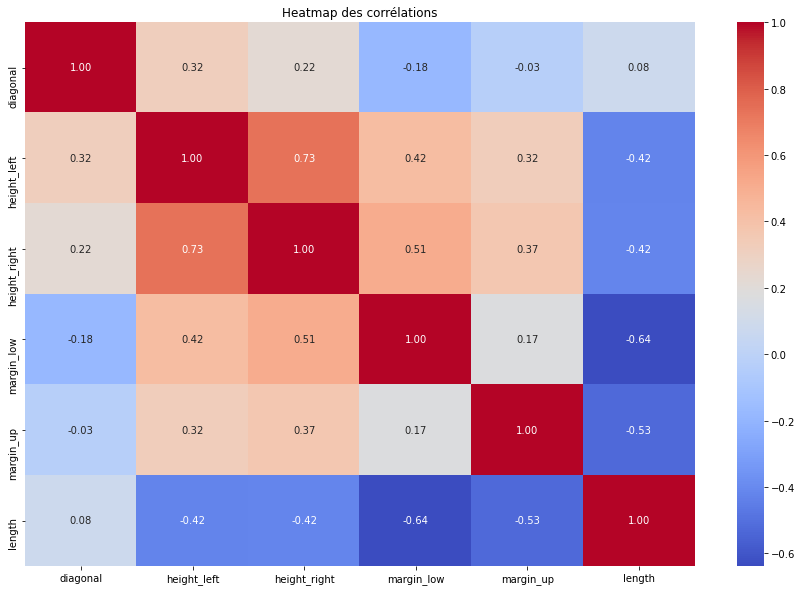

In [17]:
#HeatMap des corrélations linéaires à partir de la matrice précédente
plt.figure(figsize=(15, 10))
sns.heatmap(data.iloc[:, 1:].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap des corrélations')

plt.savefig("graphiques/heatmap.png")
plt.show()

# **Mission 1**

### Vous réaliserez une analyse en composantes principales de l'échantillon, en suivant toutes ces étapes :

* analyse de l'éboulis des valeurs propres ;
* représentation des variables par le cercle des corrélations ;
* représentation des individus par les plans factoriels ;
* analyser de la qualité de représentation et la contribution des individus.

Pour chacune de ces étapes, commentez les résultats obtenus. La variable donnant la nature Vrai/Faux du billet sera utilisée comme variable illustrative.

In [18]:
#Préparation du jeu de données pour l'ACP
df = data.copy()
df.index = df['is_genuine']
del df['is_genuine']

#Transformation des données en array Numpy
X = df.values

names = df.index

#Centrage/réduction des données (éviter les écarts d'échelle, les données prendront toutes la même importance)
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

**Analyse de l'éboulis des valeurs propres**

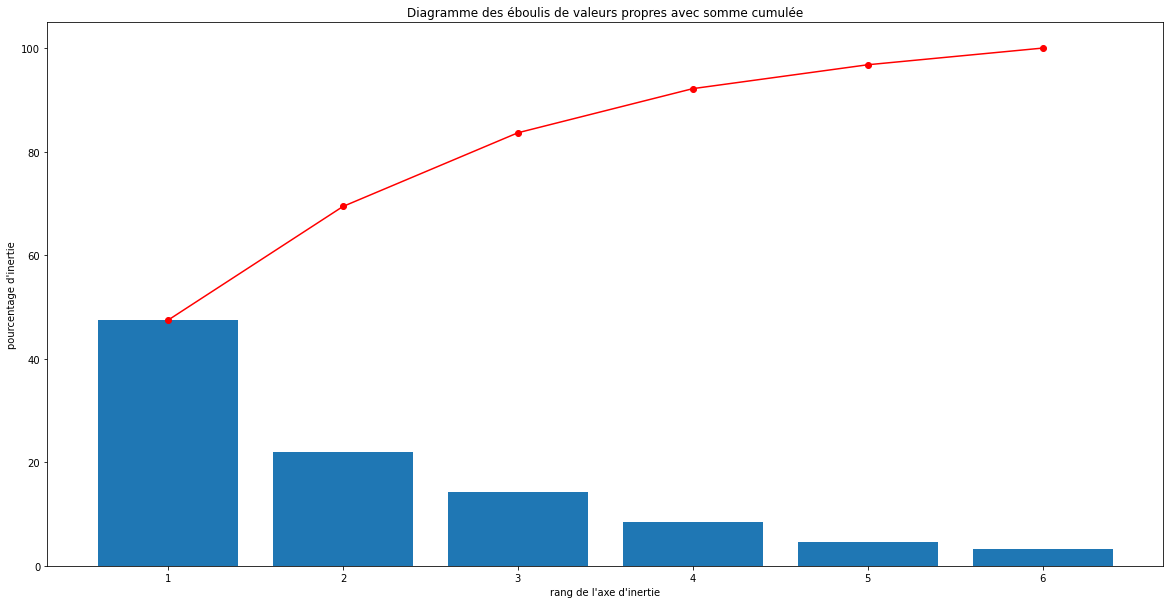

In [19]:
#Représentation de la variance expliquée: Diagramme des éboulis de valeurs propres avec somme cumulée
pca = decomposition.PCA()
pca.fit(X_scaled)
scree = pca.explained_variance_ratio_*100

plt.figure(figsize(20,10))
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Diagramme des éboulis de valeurs propres avec somme cumulée")

plt.savefig("graphiques/eboulis_valeurs_propres.png")
plt.show()

In [20]:
#Calcul des composantes principales sur les deux premières
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

#Coordonnées factorielles 
X_projected = pca.transform(X_scaled)

#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
print(pca.explained_variance_ratio_.cumsum())

[0.47447921 0.69405027]


69% de la variance des données est expliquée par les deux premières composantes. L'analyse sera traitée ainsi, car l'ajout d'autres composantes n'apporte pas réellement de valeur ajoutée, du moins pas dans notre contexte actuel ==> méthode du coude

**Cercle des corrélations des variables**

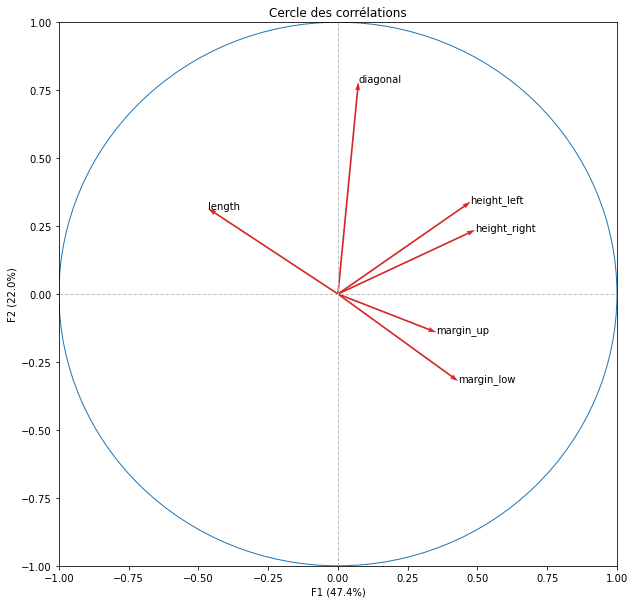

In [21]:
#Cercle des corrélations des variables
pcs = pca.components_

fig = plt.subplots(figsize=(10,10))
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
           pcs[0,:], pcs[1,:], angles='xy', scale_units='xy', scale=1, color='tab:red', width= 0.003)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.text(x, y, df.columns[i])
    
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='tab:blue')
plt.gca().add_artist(circle)

# Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Cercle des corrélations')
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))

plt.savefig("graphiques/cercle_correlation.png")
plt.show()

A partir de cette représentation graphique, nous pouvons déterminer les variables qui se révélent être les plus corrélées aux composantes F1 et F2. Notons également que la longueur des flèches est importante, une variable dont la longueur de la flèche est proche de 1 sera extrêmement bien représentée...

**Les plans factoriels**

In [22]:
#Coefficients de la composante principale F1
F1 = pca.components_[0]
print(F1) 
#Coefficients de la composante principale F2
F2 = pca.components_[1]
print(F2)

[ 0.07327499  0.47550205  0.4918214   0.43102671  0.35253984 -0.46537288]
[ 0.77963908  0.33925019  0.23554253 -0.32053699 -0.14111974  0.31453645]


Le premier plan factoriel est de loin le plus représentatif pour pouvoir effectuer une projection des variables et des individus, les autres composantes principales n'ont pas besoin d'être traitées.

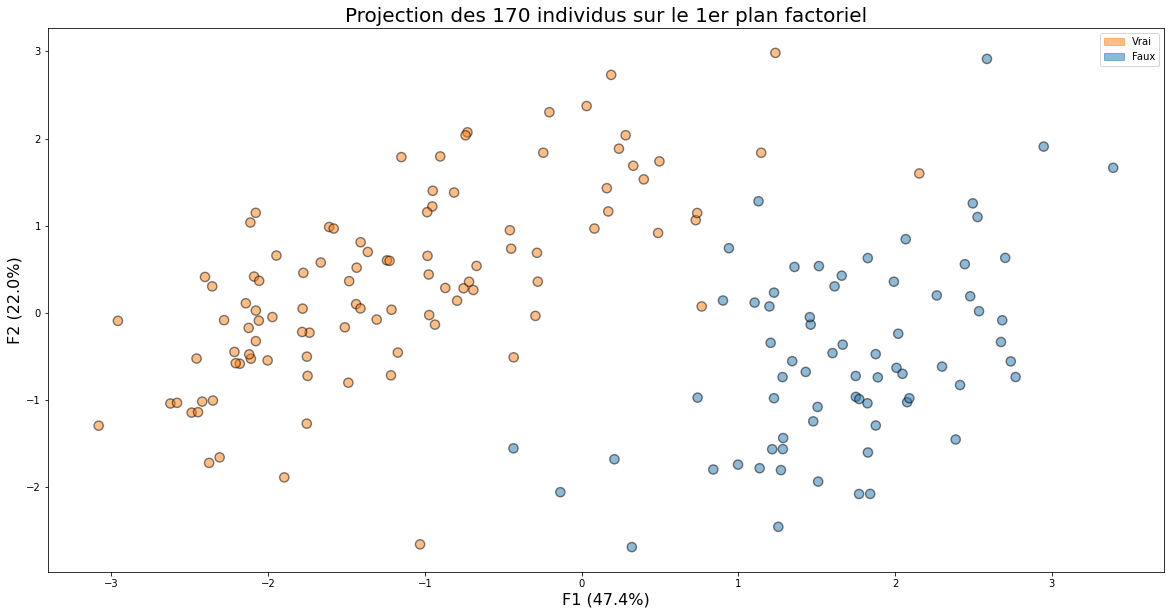

In [23]:

#Coordonnées factorielles 
X_projected = pca.transform(X_scaled)
plt.figure(figsize=(20, 10))

#Projection des indivifus par scatter Plot sur le premier plan factoriel
colors = ['tab:blue', 'tab:orange']
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=data['is_genuine'].apply(lambda x: colors[x]), 
            alpha=0.5, edgecolors='black', linewidths=1.4, s=85)

#Labels de la nature des billets
lab_0 = mpatches.Patch(color='tab:orange', alpha=0.5, label='Vrai')
lab_1 = mpatches.Patch(color='tab:blue', alpha=0.5, label='Faux')
plt.legend(handles=[lab_0, lab_1])

plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)), fontsize=16)
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)), fontsize=16)
plt.title("Projection des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]), fontsize=20)


plt.show()

Le premier plan factoriel nous démontre que les individus sont relativement bien représentés. En effet, un individu mal représenté sera proche de l'origine, avec par conséquent peu de contribution à la formation des axes étudiés. Ici, ce n'est pas le cas, on distingue parfaitement deux groupes d'individus, avec un large espace proche de l'origine.

In [24]:
#Calcul des composantes principales
#Ici seulement F1 et F2 seront utiles à l'interprétation attendue

df_facto = pd.DataFrame(X_projected, index=df.index, columns=["F" + str(i+1) for i in range(2)])

df_facto2 = df_facto.groupby('is_genuine').mean()

#Contribution des individus dans l'inertie totale
di = np.sum(X_scaled**2,axis=1)
ctr_indiv_inertie = pd.DataFrame({'c_inertie':di, 'is_genuine':df.index})


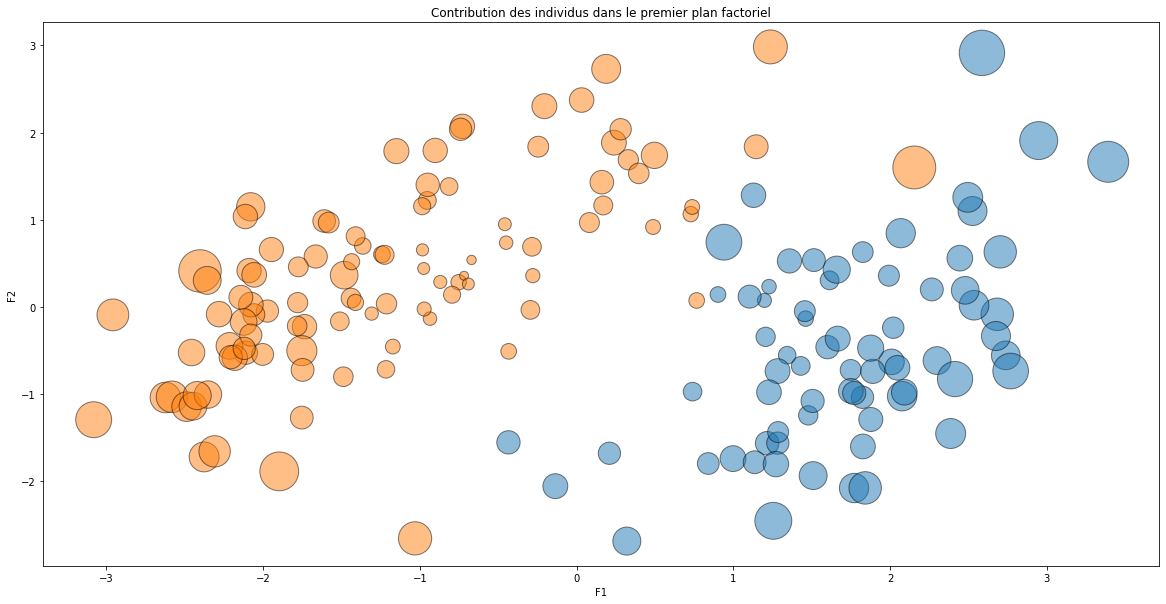

In [25]:
#Scatter Plot de la contribution des individus dans l'inertie totale
color = ['tab:blue', 'tab:orange']
plt.scatter(df_facto['F1'], df_facto['F2'], c=data['is_genuine'].apply(lambda x: color[x]), 
            alpha=0.5, edgecolors='black', linewidths=1,
            s=ctr_indiv_inertie['c_inertie']*100)

plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Contribution des individus dans le premier plan factoriel')

plt.savefig('graphiques/contribution_inertie.png')
plt.show()


Il est judicieux de remarquer, du moins de prêter attention aux points dont la contribution est supérieure à la moyenne, car se sont ces individus qui permettent de donner un sens à l’axe. De plus, une contribution trop importante d’un des points à un axe doit être regardé avec prudence (~25% d’inertie).

**Qualité de réprésentation des individus (COS2):**

In [26]:
#Qualité de représentation des individus - COS2
cos2 = X_projected**2
n_comp = 2

for j in range(n_comp):
    cos2[:,j] = cos2[:,j]/di
    
cos2_indiv = pd.DataFrame({'COS2_1':cos2[:,0],'COS2_2':cos2[:,1], 'is_genuine': data['is_genuine']})
cos2_indiv['COS2_1'].sum()
print(cos2_indiv.sum())

print(cos2_indiv)

COS2_1         80.251555
COS2_2         36.540380
is_genuine    100.000000
dtype: float64
       COS2_1    COS2_2  is_genuine
0    0.251929  0.139000        True
1    0.818002  0.050822        True
2    0.784862  0.000466        True
3    0.882856  0.001652        True
4    0.320145  0.009417        True
..        ...       ...         ...
165  0.800651  0.004703       False
166  0.324059  0.411824       False
167  0.498809  0.083461       False
168  0.156908  0.271800       False
169  0.421817  0.217111       False

[170 rows x 3 columns]


Lorsque l’angle est proche de 0, c'est-à-dire que le cosinus est proche de 1, l’individu est bien représenté. Dans le cas inverse, l’angle est proche de 90° et le cosinusest proche de 0

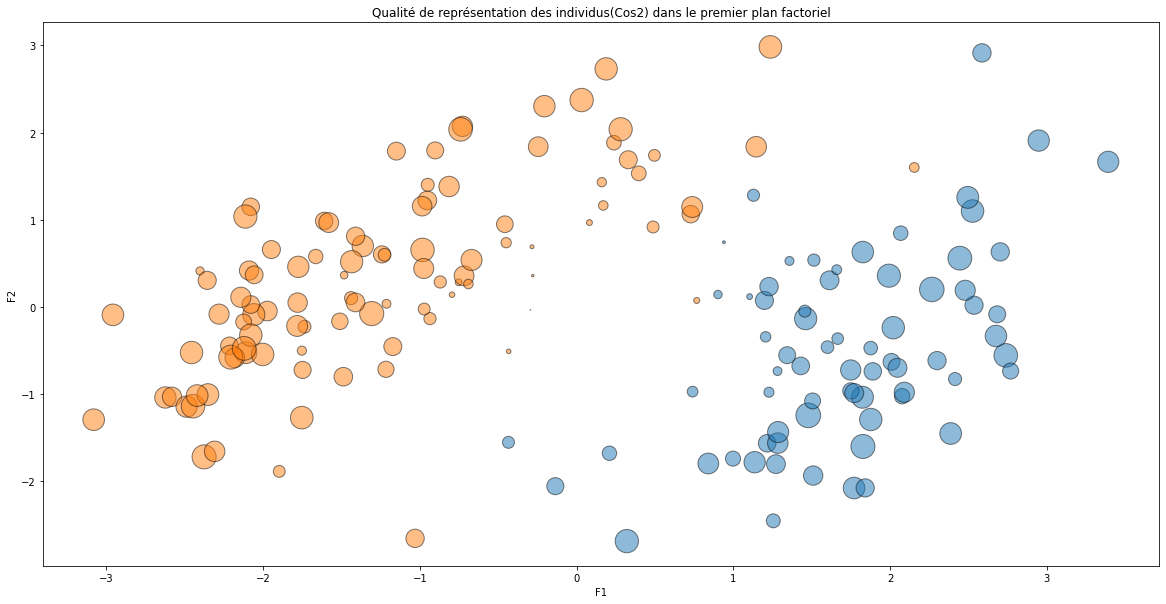

In [27]:
#Scatter Plot de la qualité de représentation des individus dans le 1er plan factoriel
cos2_indiv['COS2_1 + COS2_2'] = cos2_indiv['COS2_1'] + cos2_indiv['COS2_2']
colors = ['tab:blue', 'tab:orange']
plt.scatter(df_facto['F1'], df_facto['F2'], c=data['is_genuine'].apply(lambda x: colors[x]), 
            alpha=0.5, edgecolors='black', linewidths=1,
            s=(cos2_indiv['COS2_1 + COS2_2']*25)**2)

plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Qualité de représentation des individus(Cos2) dans le premier plan factoriel')

plt.savefig('graphiques/qualite_representationcos2.png')
plt.show()

Ce scatter plot sur le premier plan factoriel nous démontre que les individus sont relativement très bien représentés. En effet, un individu mal représenté sera proche de l'origine, avec par conséquent peu de contribution à la formation des axes étudiés. Ici, ce n'est pas le cas, on distingue parfaitement deux groupes d'individus, avec un large espace proche de l'origine.

**Contribution des individus aux axes (CTR):**

In [28]:
#Dimensions 
(n, p) = df.shape

#Calcul des valeurs propres à partir des valeurs singulières
eigval = pca.singular_values_**2/n

#Contribution aux axes
ctr = X_projected**2
for j in range(2):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])
    
ctr_indiv = pd.DataFrame({'Billet':data.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})
ctr_indiv.sum()

Billet    14365.0
CTR_1         1.0
CTR_2         1.0
dtype: float64

On relève, pour chaque axe, quels sont les individus qui ont la plus forte contribution à la formation de l'axe. Il est désormais facile de pouvoir déterminer les individus dont la contribution est supérieure pour donner un sens aux axes.

# Mission 2

### Appliquez un algorithme de classification, puis analysez le résultat obtenu.

Visualisez la partition obtenue dans le premier plan factoriel de l'ACP, puis analysez-la.

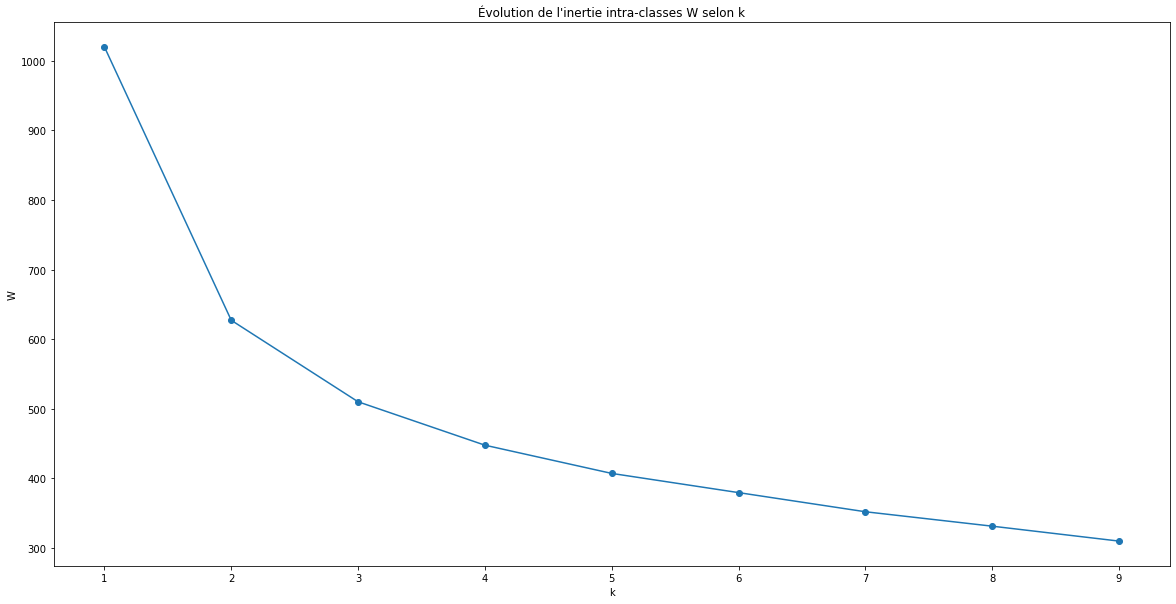

In [29]:
#Choix des clusters

#Liste dans laquelle on stocke les inerties
inerties=[]

#Boucle de 1 à 9 pour tester toutes ces possibiliéts
for k in range(1, 10):
    #pour chaque k, on crée un modèle et on l’ajuste
    km = cluster.KMeans(n_clusters=k)
    km.fit(X_scaled)
    #on stocke l’inertie associée
    inerties.append(km.inertia_)

#Visualisation des valeurs d'inertie pour chaque nombre de cluster
plt.plot(range(1, 10), inerties, marker='o')
plt.xlabel('k')
plt.ylabel('W')
plt.title("Évolution de l'inertie intra-classes W selon k")

plt.savefig("graphiques/kmeans_inertie.png")
plt.show()

Par la Méthode du coude, nous avons la confirmation d'un k=2 

In [30]:
#Classification des individus par apprentissage non-supervisé K-Means en deux clusters 
cls = cluster.KMeans(n_clusters=2) 
cls.fit(X_scaled)

KMeans(n_clusters=2)

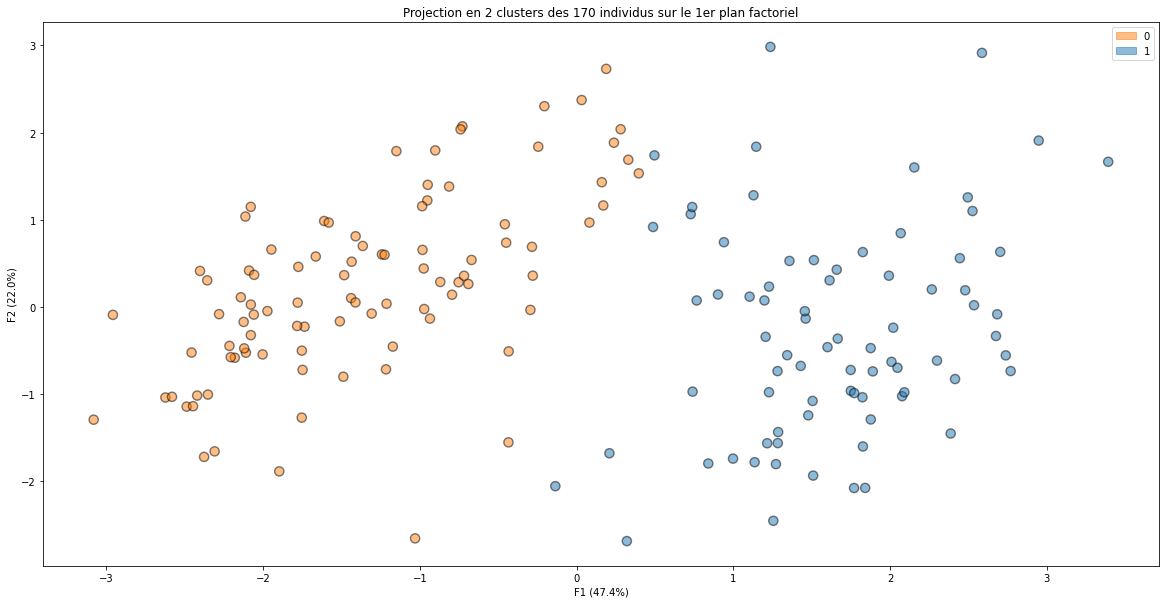

In [31]:
#Visualisation de nos deux clusters dans le premier plan factoriel

plt.figure(figsize=(20, 10))

categories = cls.labels_
colormap = np.array(['tab:orange', 'tab:blue'])

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=colormap[categories], 
            alpha=0.5, edgecolors='black', linewidths=1.4, s=85)

lab_0 = mpatches.Patch(color='tab:orange', alpha=0.5, label='0')
lab_1 = mpatches.Patch(color='tab:blue', alpha=0.5, label='1')
plt.legend(handles=[lab_0, lab_1])

plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 2 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))

plt.savefig("graphiques/projection_kmeans.png")
plt.show()

Plus de 69% de la variance des données est expliquée par les deux premières composantes, ce qui est plutôt pas mal. L'avantage du K-Means est d'obtenir directement des données centrées/réduites facilitant l'interprétation. Ci-dessous les centroïdes des deux clusters pour chacune des 6 variables.

In [32]:
#Tableau des Centroïdes 2 clusters dans sa version centrée réduite
#La comparaison est tout de suite simplifiée, les dimensions prenant la même importance!
centroids = cls.cluster_centers_
pd.DataFrame(centroids, columns=df.columns)

,diagonal,height_left,height_right,margin_low,margin_up,length
0,0.053092,-0.535301,-0.596763,-0.675496,-0.531933,0.726801
1,-0.064124,0.646532,0.720765,0.815858,0.642464,-0.877825


In [33]:
#Intégration des clusters dans notre dataframe "df_cls" par la méthode .concat()
df_cls = pd.DataFrame(cls.fit_predict(X), columns=['cluster'])
df_cls = pd.concat([df_cls, data], axis=1)

#Tableau des correspondances clusters/nature billets
tableau = pd.crosstab(cls.labels_,df_cls['is_genuine'])
tableau.index = ['Cluster 0','Cluster 1']
tableau.columns = ['Faux','Vrai']

a = tableau.loc['Cluster 0', 'Faux']
b = tableau.loc['Cluster 0', 'Vrai'] 

if a > b : 
    tableau.index = ['Cluster 0 - Faux','Cluster 1 - Vrai']
else :
    tableau.index = ['Cluster 0 - Vrai','Cluster 1 - Faux']
tableau

,Faux,Vrai
Cluster 0 - Vrai,2,99
Cluster 1 - Faux,68,1


# Mission 3


Modélisez les données à l'aide d'une régression logistique. Grâce à celle-ci, vous créerez un programme capable d'effectuer une prédiction sur un billet, c'est-à-dire de déterminer s'il s'agit d'un vrai ou d'un faux billet. Pour chaque billet, votre algorithme de classification devra donner la probabilité que le billet soit vrai. Si cette probabilité est supérieure ou égale à 0.5, le billet sera considéré comme vrai. Dans le cas contraire, il sera considéré comme faux.

**Modélisation des données à l'aide d'une Régression Logistique**

In [34]:
#Préparation des données
X = df_cls.copy()
X = X.iloc[:, 2:]
y = df_cls.iloc[:, 1]


#Instanciation d'un modèle nommé lr
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)

#Sauvegarde du modèle lr 
import pickle
with open('model.pkl', 'wb') as f:
    my_pickler = pickle.Pickler(f)
    my_pickler.dump(lr)

## Application sur le fichier test_exemple.csv

**Dataframe final avec résultats des classifications:** Pour chaque billet, l'algorithme de classification donnera la probabilité que le billet soit vrai. Si cette probabilité est supérieure ou égale à 0.5, le billet sera considéré comme vrai. Dans le cas contraire, il sera considéré comme faux.

In [35]:
def DetectezFauxBillets (y) :
    resultat = []
    y = pd.read_csv(y)
    Z = y.iloc[:, :-1]
    probability = lr.predict_proba(Z.values)[:, 1]
    proba = pd.Series((probability.round(3))*100, name='Probabilité (%)')
    df0_final = pd.concat([y, proba], axis=1)

    for i in (df0_final['Probabilité (%)'] >= 50):
        if i is True :
            resultat.append('Vrai Billet')
        else :
            resultat.append('Faux Billet')
    df0_final['Resultat'] = resultat
    return df0_final 

In [36]:
DetectezFauxBillets('example.csv')

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Probabilité (%),Resultat
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,4.0,Faux Billet
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0.9,Faux Billet
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,2.8,Faux Billet
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,87.7,Vrai Billet
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,99.6,Vrai Billet


In [37]:
DetectezFauxBillets('test_notes_P6.csv')

,diagonal,height_left,height_right,margin_low,margin_up,length,id,Probabilité (%),Resultat
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1,95.8,Vrai Billet
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2,6.0,Faux Billet
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3,99.4,Vrai Billet
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4,0.4,Faux Billet
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5,9.1,Faux Billet
